In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score , classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('1.simple_loan_data.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [7]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Count'>

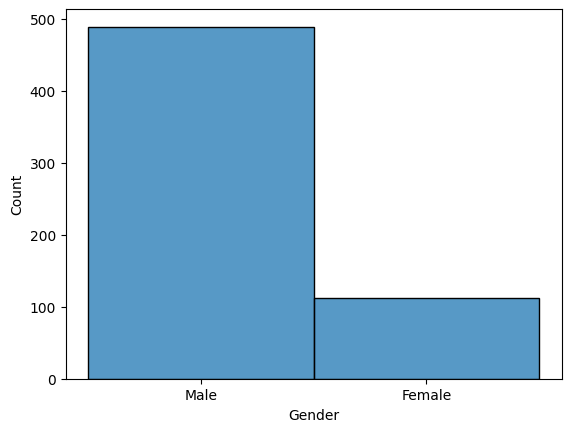

In [8]:
sns.histplot(df["Gender"])

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

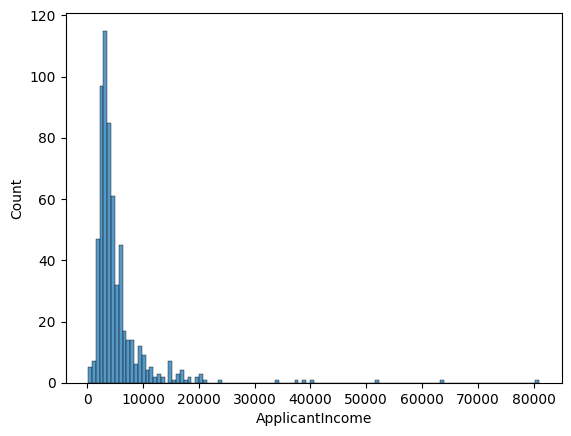

In [9]:
sns.histplot(df['ApplicantIncome'])

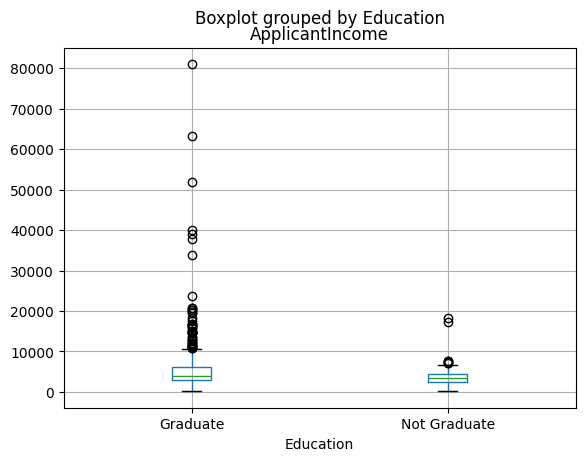

In [10]:
df.boxplot(column='ApplicantIncome',by = 'Education');


<Axes: ylabel='ApplicantIncome'>

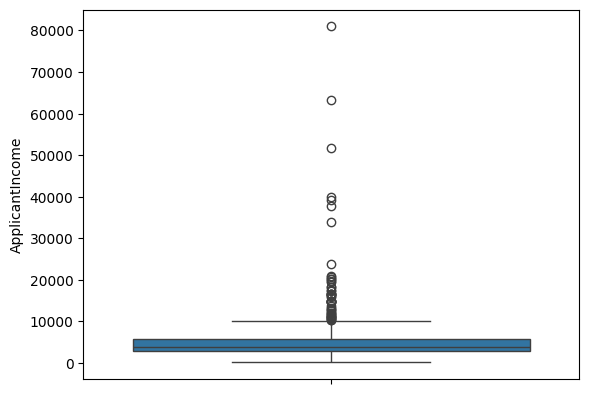

In [11]:
sns.boxplot(df['ApplicantIncome'])

In [12]:
# interpreattion

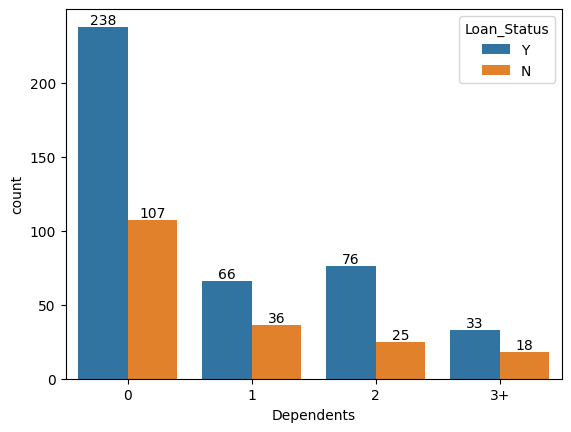

In [13]:
ax = sns.countplot(x =df['Dependents'], hue = df['Loan_Status'])
for bar in ax.containers:
    ax.bar_label(bar)

In [14]:
# interpreattion

In [15]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [18]:
df['Gender'].value_counts().to_dict()

{'Male': 489, 'Female': 112}

In [19]:
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [20]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [21]:
df['Married'].value_counts().to_dict()

{'Yes': 398, 'No': 213}

In [22]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [23]:
df['Married'].replace({'Yes':1,'No':0},inplace=True)

In [24]:
df['Education'].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [25]:
df['Education'].replace({'Graduate':1,'Not Graduate':0}, inplace=True)

In [26]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1.0,1.0,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1.0,1.0,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1.0,1.0,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(6), int64(2), object(5)
memory usage: 62.5+ KB


In [28]:
# interpreattion

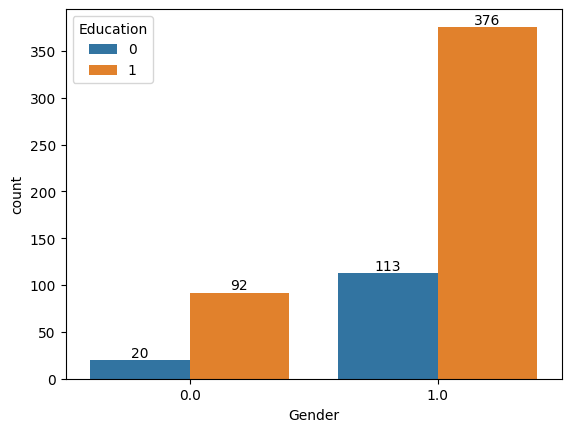

In [29]:
ax = sns.countplot(x = df['Gender'], hue = df['Education'])
for bar in ax.containers:
    ax.bar_label(bar)

In [30]:
# interpreattion

In [31]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1.0,1.0,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1.0,1.0,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1.0,1.0,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
df['Self_Employed'].value_counts().to_dict()

{'No': 500, 'Yes': 82}

In [33]:
df['Self_Employed'].replace({'No':0,'Yes':1},inplace=True)

In [34]:
df['Property_Area'].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [35]:
df['Property_Area'].replace({'Semiurban':1,'Urban':2,'Rural':0},inplace=True)

In [36]:
df['Dependents'].value_counts().to_dict()

{'0': 345, '1': 102, '2': 101, '3+': 51}

In [37]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [38]:
df['Dependents'].replace({'3+':3},inplace=True)

In [39]:
df['Dependents'].unique()

array(['0', '1', '2', 3, nan], dtype=object)

In [40]:
df['Dependents']=df['Dependents'].astype(float)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      582 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(3), object(2)
memory usage: 62.5+ KB


In [42]:
#df['Loan_Status'].value_counts().to_dict()

In [43]:
#df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [44]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,Y


# Handling missing values

In [45]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(mode)

In [47]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [49]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [50]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [51]:
df['LoanAmount'].mean()

146.41216216216216

In [52]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [53]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,Y
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,Y
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,Y
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,Y
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,Y


In [55]:
mean_N = df.groupby('Loan_Status').get_group('N')['LoanAmount'].mean()
mean_N

151.22099447513813

In [56]:
mean_Y = df.groupby('Loan_Status').get_group('Y')['LoanAmount'].mean()
mean_Y

144.29440389294405

In [57]:
df.loc[df['Loan_Status']=='N','LoanAmount'] = df.loc[df['Loan_Status'] == 'N','LoanAmount'].fillna(mean_N)

In [58]:
df.loc[df['Loan_Status']=='Y','LoanAmount'] = df.loc[df['Loan_Status'] == 'Y','LoanAmount'].fillna(mean_Y)

In [59]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [60]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [61]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(8), int64(3), object(2)
memory usage: 62.5+ KB


In [63]:
# interpreattion

In [64]:
x = df.drop(['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

In [67]:
x_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [68]:
y_train.unique()

array(['N', 'Y'], dtype=object)

# LogisticRegression

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
log_r = LogisticRegression()
log_r.fit(x_train,y_train )

LogisticRegression()

In [71]:
# Testing data evaluation
y_pred_logs = log_r.predict(x_test)

cns_matrix = confusion_matrix(y_test, y_pred_logs)
print('Confusion_matrix :\n', cns_matrix )

acc_score_LR = accuracy_score(y_test,y_pred_logs)
print('Accuracy_score :\n', acc_score_LR)

clas_report = classification_report(y_test, y_pred_logs)
print('Classification_report :\n', clas_report)

Confusion_matrix :
 [[ 23  35]
 [  5 122]]
Accuracy_score :
 0.7837837837837838
Classification_report :
               precision    recall  f1-score   support

           N       0.82      0.40      0.53        58
           Y       0.78      0.96      0.86       127

    accuracy                           0.78       185
   macro avg       0.80      0.68      0.70       185
weighted avg       0.79      0.78      0.76       185



In [72]:
# Training data evaluation
y_pred_train_log = log_r.predict(x_train)

cof_mat = confusion_matrix(y_train, y_pred_train_log)
print('Confusion_matrix :\n', cof_mat)

acc_score = accuracy_score(y_train, y_pred_train_log)
print('Accuracy_score :\n', acc_score)

clas_report = classification_report(y_train, y_pred_train_log)
print('Accuracy_report :\n', clas_report)

Confusion_matrix :
 [[ 62  72]
 [  9 286]]
Accuracy_score :
 0.8111888111888111
Accuracy_report :
               precision    recall  f1-score   support

           N       0.87      0.46      0.60       134
           Y       0.80      0.97      0.88       295

    accuracy                           0.81       429
   macro avg       0.84      0.72      0.74       429
weighted avg       0.82      0.81      0.79       429



#

# KNeighborsClassifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn_cls =KNeighborsClassifier()
knn_cls.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
y_pred_knn = knn_cls.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred_knn)
print('Confusion_matrix :\n', cnf_matrix)

acc_score_KNN = accuracy_score(y_test, y_pred_knn)
print('Accuracy_score :\n', acc_score_KNN)

cls_report = classification_report(y_test, y_pred_knn)
print('classificatioin_report :\n', cls_report)

Confusion_matrix :
 [[ 15  43]
 [ 25 102]]
Accuracy_score :
 0.6324324324324324
classificatioin_report :
               precision    recall  f1-score   support

           N       0.38      0.26      0.31        58
           Y       0.70      0.80      0.75       127

    accuracy                           0.63       185
   macro avg       0.54      0.53      0.53       185
weighted avg       0.60      0.63      0.61       185



In [76]:
# Training data evaluation 
y_pred_train_knn = knn_cls.predict(x_train)

cof_mat = confusion_matrix(y_train, y_pred_train_knn)
print('Confusion_matrix :\n', cof_mat)

acc_score = accuracy_score(y_train, y_pred_train_knn)
print('Accuracy_score :\n', acc_score)

clf_report = classification_report(y_train, y_pred_train_knn)
print('Classifiactoion_report :\n', clf_report)

Confusion_matrix :
 [[ 37  97]
 [ 23 272]]
Accuracy_score :
 0.7202797202797203
Classifiactoion_report :
               precision    recall  f1-score   support

           N       0.62      0.28      0.38       134
           Y       0.74      0.92      0.82       295

    accuracy                           0.72       429
   macro avg       0.68      0.60      0.60       429
weighted avg       0.70      0.72      0.68       429



In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [78]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [79]:
std_scaler.fit_transform(x_train)

array([[ 0.49343516,  0.75592895,  1.22292747, ...,  2.0824315 ,
         0.41873914, -0.02961563],
       [ 0.49343516, -1.32287566, -0.74568748, ...,  0.27656307,
         0.41873914,  1.24089471],
       [ 0.49343516,  0.75592895, -0.74568748, ...,  0.27656307,
         0.41873914, -0.02961563],
       ...,
       [-2.02660871, -1.32287566, -0.74568748, ...,  0.27656307,
         0.41873914, -0.02961563],
       [ 0.49343516,  0.75592895,  0.23861999, ...,  0.27656307,
        -2.38812165, -0.02961563],
       [ 0.49343516, -1.32287566, -0.74568748, ...,  2.0824315 ,
        -2.38812165, -0.02961563]])

In [80]:
std_scaler.fit_transform(x_test)

array([[-2.36794064,  0.66731739, -0.71973357, ...,  0.26603635,
        -2.52982213, -0.08948297],
       [ 0.42230788,  0.66731739, -0.71973357, ...,  0.26603635,
        -2.52982213,  1.18392851],
       [ 0.42230788, -1.4985373 , -0.71973357, ...,  0.26603635,
         0.39528471, -1.36289445],
       ...,
       [ 0.42230788,  0.66731739,  1.29770144, ..., -2.77203312,
         0.39528471,  1.18392851],
       [ 0.42230788,  0.66731739,  1.29770144, ...,  0.26603635,
         0.39528471, -0.08948297],
       [-2.36794064,  0.66731739, -0.71973357, ...,  0.26603635,
         0.39528471, -0.08948297]])

# Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [83]:
# Testing data evaluation 
y_pred_dect = dt_model.predict(x_test)

cof_matrix = confusion_matrix(y_test, y_pred_dect)
print('Confusion_tree :\n', cof_matrix)

acc_score_DT = accuracy_score(y_test, y_pred_dect)
print('Accuracy_score :\n', acc_score_DT)

clf_report = classification_report(y_test, y_pred_dect)
print('Classification_report :\n', clf_report)

Confusion_tree :
 [[ 32  26]
 [ 25 102]]
Accuracy_score :
 0.7243243243243244
Classification_report :
               precision    recall  f1-score   support

           N       0.56      0.55      0.56        58
           Y       0.80      0.80      0.80       127

    accuracy                           0.72       185
   macro avg       0.68      0.68      0.68       185
weighted avg       0.72      0.72      0.72       185



In [84]:
# Training data evaluation 
y_prd_dict_train = dt_model.predict(x_train) 

cof_mat = confusion_matrix(y_train, y_prd_dict_train)
print('Confusion_tree :\n', cof_mat)

acc_score = accuracy_score(y_train, y_prd_dict_train)
print('Accuracy_sxore :\n', acc_score)

clf_report = classification_report(y_train, y_prd_dict_train)
print('classification_report :\n', clf_report)

Confusion_tree :
 [[134   0]
 [  0 295]]
Accuracy_sxore :
 1.0
classification_report :
               precision    recall  f1-score   support

           N       1.00      1.00      1.00       134
           Y       1.00      1.00      1.00       295

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429



In [85]:
dt_model=DecisionTreeClassifier()
hyp={'criterion':['gini','entropy'],
     'max_depth':np.arange(2,10),
     'min_samples_split':np.arange(2,10),
     'min_samples_leaf':np.arange(2,10)
     
    }
rscv_model=RandomizedSearchCV(dt_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [86]:
rscv_model.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=9, min_samples_split=7)

# Random forest

In [87]:
rd_model = RandomForestClassifier()
rd_model.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
rd_model = rscv_model.best_estimator_
rd_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=9, min_samples_split=7)

In [89]:
# Testing daxa evaluation 
y_pred_rd =rd_model.predict(x_test)

con_mat = confusion_matrix(y_test,y_pred_rd)
print('Confusion_matrix :\n',con_mat)

acc_score_RD = accuracy_score(y_test,y_pred_rd)
print('Accuracy_score :\n', acc_score_RD)

clf_report = classification_report(y_test,y_pred_rd)
print('Classification_report :\n', clf_report)

Confusion_matrix :
 [[ 23  35]
 [  2 125]]
Accuracy_score :
 0.8
Classification_report :
               precision    recall  f1-score   support

           N       0.92      0.40      0.55        58
           Y       0.78      0.98      0.87       127

    accuracy                           0.80       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.80      0.77       185



In [90]:
# Training data evaluation 
y_pred_train_rd = rd_model.predict(x_train)

con_matrix = confusion_matrix(y_train, y_pred_train_rd)
print('Confusion_matrix :\n', con_mat)

acc_score = accuracy_score(y_train, y_pred_train_rd)
print('Accuracy_score :\n', acc_score)

clf_report =  classification_report(y_train, y_pred_train_rd)
print('Classification_report :\n', clf_report)

Confusion_matrix :
 [[ 23  35]
 [  2 125]]
Accuracy_score :
 0.8135198135198135
Classification_report :
               precision    recall  f1-score   support

           N       0.92      0.44      0.60       134
           Y       0.79      0.98      0.88       295

    accuracy                           0.81       429
   macro avg       0.86      0.71      0.74       429
weighted avg       0.83      0.81      0.79       429



In [91]:
# HYP 
rd_model = RandomForestClassifier()
hyp = {'criterion':['gini','entropy'],
       'max_depth':np.arange(2,10),
       'min_samples_split':np.arange(2,10),
       'min_samples_leaf':np.arange(2,10),

      }
rscv_model=RandomizedSearchCV(rd_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [92]:
rscv_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=7)

In [93]:
print('acc_score_LR :', acc_score_LR , 'acc_score_KNN :', acc_score_KNN, 'acc_score_DT :', acc_score_DT, 'acc_score_RD :', acc_score_RD)

acc_score_LR : 0.7837837837837838 acc_score_KNN : 0.6324324324324324 acc_score_DT : 0.7243243243243244 acc_score_RD : 0.8
